In [21]:
# Importing Libraries
import yfinance as yf
import numpy as np
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# taking inputs of period for which to analyze assets
start_year = int(input("Enter the Starting Year \n"))
start_month = int(input("Enter the Starting Month \n"))
start_date = int(input("Enter the Starting Date \n"))
end_year = int(input("Enter the Ending Year \n"))
end_month = int(input("Enter the Ending Month \n"))
end_date = int(input("Enter the Ending Date \n"))

Enter the Starting Year 
2020
Enter the Starting Month 
1
Enter the Starting Date 
1
Enter the Ending Year 
2023
Enter the Ending Month 
11
Enter the Ending Date 
5


In [3]:
# Taking different asset classes
stocks = ['AMZN', 'MSFT', 'AAPL', 'ADANIPOWER.NS', 'TSLA']
crypto = ['BTC-USD', 'ETH-USD', 'XRP-USD']
gold = ['GLD', 'IAU']
mutual_funds = ['USNQX', 'SWLGX']
bonds = ['VSCSX', 'GIBIX']
real_estate = ['WELL', 'PSA']

# Combining all asset classes in a single list
assets = stocks + crypto + gold + mutual_funds + bonds + real_estate

# Printing
print('The number of assets taken are:-')
print(len(assets))
print('The assets are:-')
for asset in assets:
  print(asset)

The number of assets taken are:-
16
The assets are:-
AMZN
MSFT
AAPL
ADANIPOWER.NS
TSLA
BTC-USD
ETH-USD
XRP-USD
GLD
IAU
USNQX
SWLGX
VSCSX
GIBIX
WELL
PSA


In [4]:
# Defining start and end objects
start = dt.datetime(start_year, start_month, start_date)
end = dt.datetime(end_year, end_month, end_date)

# Downloading Stock Data
df = yf.download(assets, period='1d', start=start, end=end)
# Taking only adj close
df = df['Adj Close']
# Dropping Nan values
df = df.dropna()
df

[*********************100%%**********************]  16 of 16 completed


,AAPL,ADANIPOWER.NS,AMZN,BTC-USD,ETH-USD,GIBIX,GLD,IAU,MSFT,PSA,SWLGX,TSLA,USNQX,VSCSX,WELL,XRP-USD
Date,,,,,,,,,,,,,,,,
2020-01-02,73.249016,64.449997,94.900497,6985.470215,127.410179,23.641138,143.949997,29.219999,155.093658,179.820816,51.222305,28.684000,22.450827,20.620607,70.194038,0.188043
2020-01-03,72.536903,63.250000,93.748497,7344.884277,134.171707,23.736889,145.860001,29.620001,153.162506,181.760040,50.893398,29.534000,22.251184,20.648655,71.429070,0.193521
2020-01-06,73.114891,60.099998,95.143997,7769.219238,144.304153,23.728182,147.389999,29.920000,153.558395,182.406433,51.202961,30.102667,22.387304,20.639307,72.515144,0.221510
2020-01-07,72.771004,61.000000,95.343002,8163.692383,143.543991,23.710773,147.970001,30.040001,152.158264,181.683487,51.096546,31.270666,22.387304,20.639307,72.042168,0.213917
2020-01-08,73.941635,59.849998,94.598503,8079.862793,141.258133,23.658552,146.860001,29.820000,154.581924,182.015182,51.473824,32.809334,22.550650,20.629957,72.059685,0.209026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,170.289993,357.950012,132.710007,34502.363281,1810.088623,22.090000,185.100006,37.790001,337.309998,238.820007,77.550003,197.360001,36.759998,20.400000,81.870003,0.578944
2023-10-31,170.770004,363.049988,133.089996,34667.781250,1816.458984,22.059999,184.089996,37.590000,338.109985,238.710007,77.879997,200.839996,36.950001,20.330000,83.610001,0.600282
2023-11-01,173.970001,365.200012,137.000000,35437.253906,1847.089722,22.240000,183.509995,37.459999,346.070007,242.589996,79.029999,205.660004,37.599998,20.400000,85.430000,0.609538


In [5]:
# Calculating log returns
log_return = np.log(1 + df.pct_change())
log_return

,AAPL,ADANIPOWER.NS,AMZN,BTC-USD,ETH-USD,GIBIX,GLD,IAU,MSFT,PSA,SWLGX,TSLA,USNQX,VSCSX,WELL,XRP-USD
Date,,,,,,,,,,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,-0.009769,-0.018795,-0.012213,0.050172,0.051709,0.004042,0.013181,0.013596,-0.012530,0.010726,-0.006442,0.029203,-0.008932,0.001359,0.017442,0.028715
2020-01-06,0.007937,-0.051085,0.014776,0.056166,0.072803,-0.000367,0.010435,0.010077,0.002581,0.003550,0.006064,0.019072,0.006099,-0.000453,0.015091,0.135082
2020-01-07,-0.004714,0.014864,0.002089,0.049527,-0.005282,-0.000734,0.003927,0.004003,-0.009160,-0.003971,-0.002080,0.038067,0.000000,0.000000,-0.006544,-0.034880
2020-01-08,0.015958,-0.019032,-0.007839,-0.010322,-0.016053,-0.002205,-0.007530,-0.007351,0.015803,0.001824,0.007356,0.048033,0.007270,-0.000453,0.000243,-0.023129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-30,0.012230,0.010673,0.038169,0.017324,0.016737,-0.001809,-0.005657,-0.005805,0.022486,0.001047,0.013632,-0.049138,0.010941,-0.000490,0.006372,0.058391
2023-10-31,0.002815,0.014147,0.002859,0.004783,0.003513,-0.001359,-0.005472,-0.005306,0.002369,-0.000461,0.004246,0.017479,0.005155,-0.003437,0.021030,0.036194
2023-11-01,0.018565,0.005905,0.028955,0.021953,0.016722,0.008126,-0.003156,-0.003464,0.023270,0.016123,0.014658,0.023716,0.017438,0.003437,0.021534,0.015302


In [6]:
# Function for simulating different portfolio
def monte_carlo(log_return, assets, number_of_simulations):

  # calculating total assets
  number_of_assets = len(assets)

  # defining arrays to store various parameters
  all_weights = np.zeros((number_of_simulations, number_of_assets))
  ret_arr = np.zeros(number_of_simulations)
  vol_arr = np.zeros(number_of_simulations)
  sharpe_arr = np.zeros(number_of_simulations)

  # running monte carlo simulations
  for ind in range(number_of_simulations):
    weights = np.array(np.random.random(number_of_assets))
    weights = weights / np.sum(weights)
    all_weights[ind, :] = weights
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_return.cov() * 252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

  # creating a single array of all data
  simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

  # converting data to dataframe
  simulations_df = pd.DataFrame(data=simulations_data).T
  # giving column names to dataframe
  simulations_df.columns = [
    'Returns',
    'Volatility',
    'Sharpe Ratio',
    'Portfolio_Weights'
  ]
  # making sure floats aren't strings
  simulations_df = simulations_df.infer_objects()

  # returning dataframe
  return simulations_df

In [7]:
# Taking input for number of different portfolios to be considered
portfolio_sims = int(input("Enter the number of portfolios to be simulated:- \n"))

# Running Portfolio simulations
portfolio_data = monte_carlo(log_return, assets, portfolio_sims)

Enter the number of portfolios to be simulated:- 
20000


In [8]:
# Weights for different risk profiles

# Aggressive is the one which gives most returns
aggressive = portfolio_data.loc[portfolio_data['Returns'].idxmax()].Portfolio_Weights

# Moderate is the one which has max sharpe ratio
moderate = portfolio_data.loc[portfolio_data['Sharpe Ratio'].idxmax()].Portfolio_Weights

# Conservative is the one which has lowest risk
conservative = portfolio_data.loc[portfolio_data['Volatility'].idxmin()].Portfolio_Weights

# Printing different metrics for above profiles
print('Metrics for aggressive profile:-')
print(portfolio_data.loc[portfolio_data['Returns'].idxmax()])
print('\n')
print('Metrics for moderate profile:-')
print(portfolio_data.loc[portfolio_data['Sharpe Ratio'].idxmax()])
print('\n')
print('Metrics for conservative profile:-')
print(portfolio_data.loc[portfolio_data['Volatility'].idxmin()])

# printing weights
compiled_weights_data = [assets, aggressive, moderate, conservative]
# converting data to dataframe
compiled_weights_df = pd.DataFrame(data=compiled_weights_data).T
# giving column names to dataframe
compiled_weights_df.columns = [
  'Security',
  'Aggressive',
  'Moderate',
  'Conservative'
]
# making sure floats aren't strings
compiled_weights_df = compiled_weights_df.infer_objects()
compiled_weights_df

Metrics for aggressive profile:-
Returns                                                       0.360767
Volatility                                                    0.365244
Sharpe Ratio                                                  0.987742
Portfolio_Weights    [0.02688528364274029, 0.17340410763856884, 0.0...
Name: 12302, dtype: object


Metrics for moderate profile:-
Returns                                                       0.237843
Volatility                                                    0.215411
Sharpe Ratio                                                  1.104138
Portfolio_Weights    [0.046269356703418446, 0.15351958470705063, 0....
Name: 8962, dtype: object


Metrics for conservative profile:-
Returns                                                       0.125821
Volatility                                                    0.161348
Sharpe Ratio                                                   0.77981
Portfolio_Weights    [0.11194681004983506, 0.003987480797547807

,Security,Aggressive,Moderate,Conservative
0,AMZN,0.026885,0.046269,0.111947
1,MSFT,0.173404,0.153520,0.003987
2,AAPL,0.043135,0.059853,0.014279
3,ADANIPOWER.NS,0.010310,0.012162,0.057352
4,TSLA,0.175441,0.059057,0.020072
5,BTC-USD,0.031747,0.025938,0.128121
6,ETH-USD,0.030248,0.055639,0.130304
7,XRP-USD,0.012443,0.147035,0.137884
8,GLD,0.014479,0.060518,0.008146
9,IAU,0.053368,0.005179,0.080747


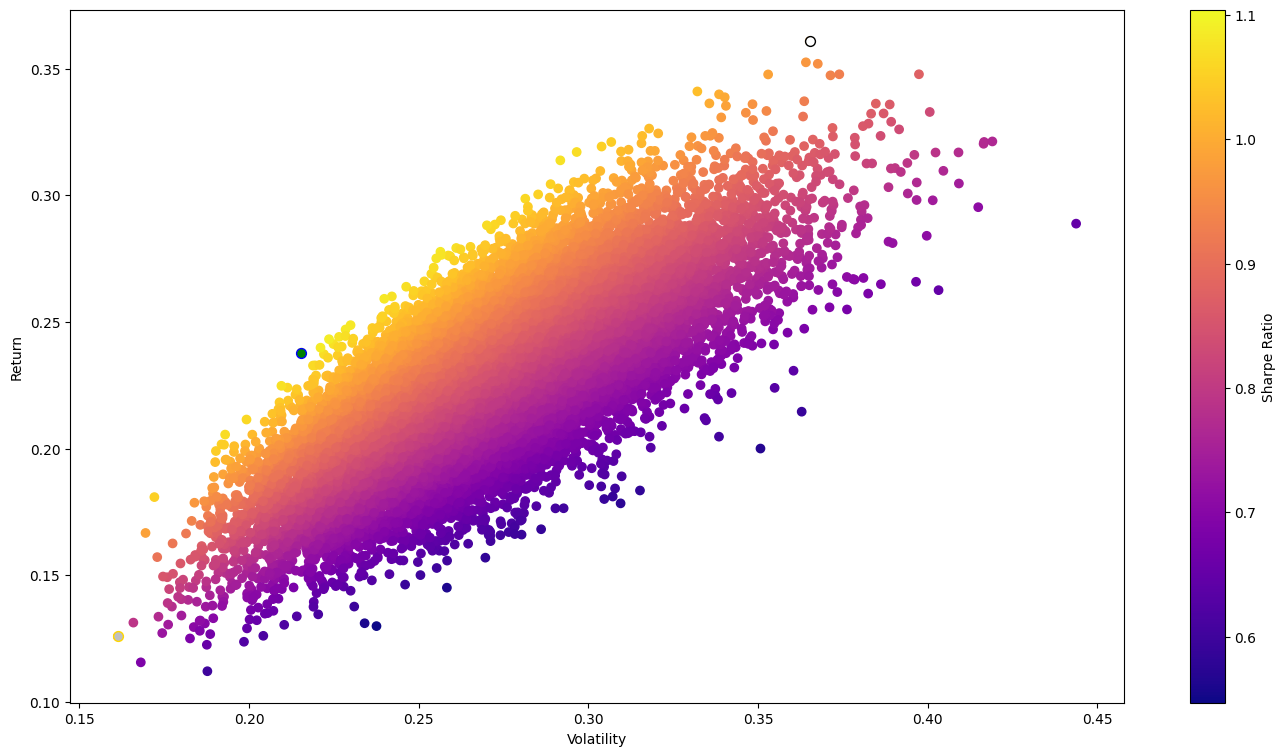

In [9]:
# Plotting risk vs returns of all portfolios
plt.figure(figsize=(17,9))
plt.scatter(portfolio_data['Volatility'],portfolio_data['Returns'],c=portfolio_data['Sharpe Ratio'],cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Coloring dots of above portfolio
# White for aggressive profile, Green for moderate one, Silver for conservative one
plt.scatter(portfolio_data['Volatility'][portfolio_data['Returns'].argmax()],portfolio_data['Returns'][portfolio_data['Returns'].argmax()],c='white',s=50,edgecolors='black')
plt.scatter(portfolio_data['Volatility'][portfolio_data['Sharpe Ratio'].argmax()],portfolio_data['Returns'][portfolio_data['Sharpe Ratio'].argmax()],c='green',s=50,edgecolors='blue')
plt.scatter(portfolio_data['Volatility'][portfolio_data['Volatility'].argmin()],portfolio_data['Returns'][portfolio_data['Volatility'].argmin()],c='silver',s=50,edgecolors='gold')

In [10]:
#Function for running monte carlo simulations to predict future returns
def monte_carlo_sims(df, assets, weights, initial_portfolio, mc_sims, T):

  # Calculating mean_returns and covariance matrix
  mean_returns = df.pct_change().mean()
  cov_matrix = df.pct_change().cov()
  number_of_assets = len(assets)
  meanM = np.full(shape=(T, number_of_assets), fill_value=mean_returns)
  meanM = meanM.T
  portfolio_sims = np.full(shape=(T, mc_sims), fill_value=0.0)

  # Running simulations
  for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size=(T, len(weights)))
    L = np.linalg.cholesky(cov_matrix)
    dailyReturns = meanM + np.inner(L, Z)
    portfolio_sims[:,m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initial_portfolio

  return portfolio_sims

In [11]:
# Function for plotting future returns
def plt_mc_sims(profile, sims):
  plt.plot(sims)
  plt.xlabel('Days')
  plt.ylabel('Portfolio Value ($)')
  plt.title(f'MC simulation of {profile} portfolio')
  plt.show()

Enter Initial Investment 
100000
Enter the number of Monte Carlo Simulations 
20000
Enter the time period in days 
252


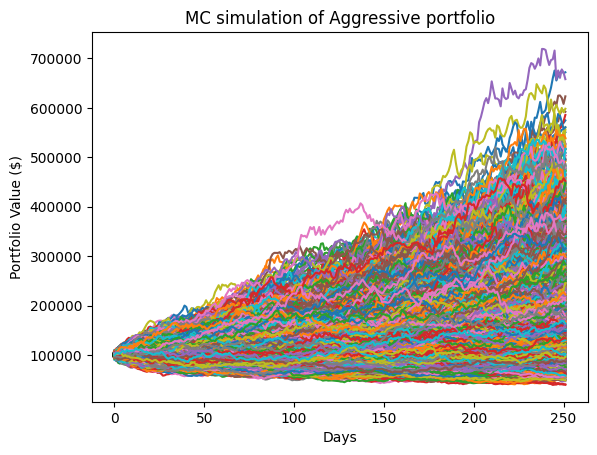

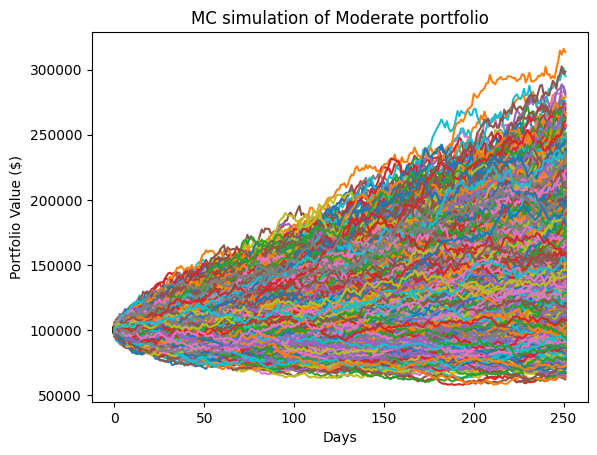

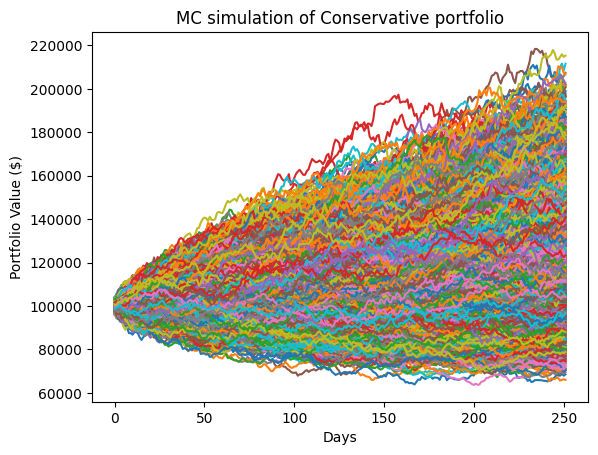

In [12]:
# Taking Inputs
initial_investment = int(input("Enter Initial Investment \n"))
mc_sims = int(input("Enter the number of Monte Carlo Simulations \n"))
time_period = int(input("Enter the time period in days \n"))

# Running MCS for different profiles
aggressive_sims = monte_carlo_sims(df, assets, aggressive, initial_investment, mc_sims, time_period)
moderate_sims = monte_carlo_sims(df, assets, moderate, initial_investment, mc_sims, time_period)
conservative_sims = monte_carlo_sims(df, assets, conservative, initial_investment, mc_sims, time_period)

# Plotting graphs of simulations
plt_mc_sims('Aggressive', aggressive_sims)
plt_mc_sims('Moderate', moderate_sims)
plt_mc_sims('Conservative', conservative_sims)

In [51]:
def analysis(sims, initial_value, time_period, mc_sims, alpha, profile):

  end_price = sims[-1][:]
  returns = (end_price - initial_value)/initial_value*100

  # Plotting return vs frequency
  fig, ax = plt.subplots()
  ax.hist(end_price, edgecolor="white")
  plt.title(f'Frequency for {profile} portfolio')
  plt.xlabel = 'Portfolio final value'
  plt.ylabel = 'Frequency'
  plt.show()

  # Plotting box plots for returns
  fig = plt.figure(figsize =(7, 7))
  ax = fig.add_axes([0, 0, 1, 1])
  plt.title(f'Box Plot for {profile} portfolio')
  bp = ax.boxplot([returns])
  plt.show()

  # Plotting mean path
  mean=np.zeros(time_period)
  for i in range(0, time_period):
      mean[i] = sims[i].mean()
  plt.title(f'Mean path of {profile} Strategy')
  plt.plot(mean)
  plt.show()

  # Plotting price volatility
  volatility=np.zeros(time_period)
  for i in range(0,time_period):
      volatility[i] = sims[i].std()
  plt.plot(volatility)
  plt.title(f'Price volatility for {profile} portfolio')
  plt.show()

  #Calculating VaR & CVaR
  VaR = np.percentile(end_price, alpha)
  print('VaR ${}'.format(round(VaR,2)))

  # Calculating and Printing some important metrics
  print(f'The maximum returns of {profile}:-')
  print(returns.max())
  print(f'The average returns of {profile}:-')
  print(returns.mean())
  print(f'The minimum returns of {profile}:-')
  print(returns.min())
  num=0
  for i in range(0,mc_sims):
    if returns[i]>0:
      num+=1
  print(f'Chances of {profile} portfolio giving +ve returns')
  print(num/mc_sims*100)

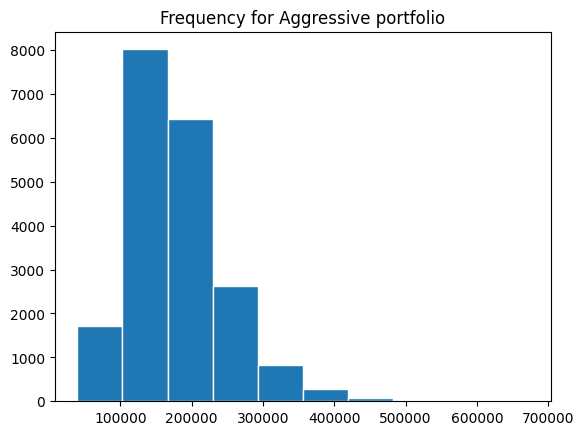

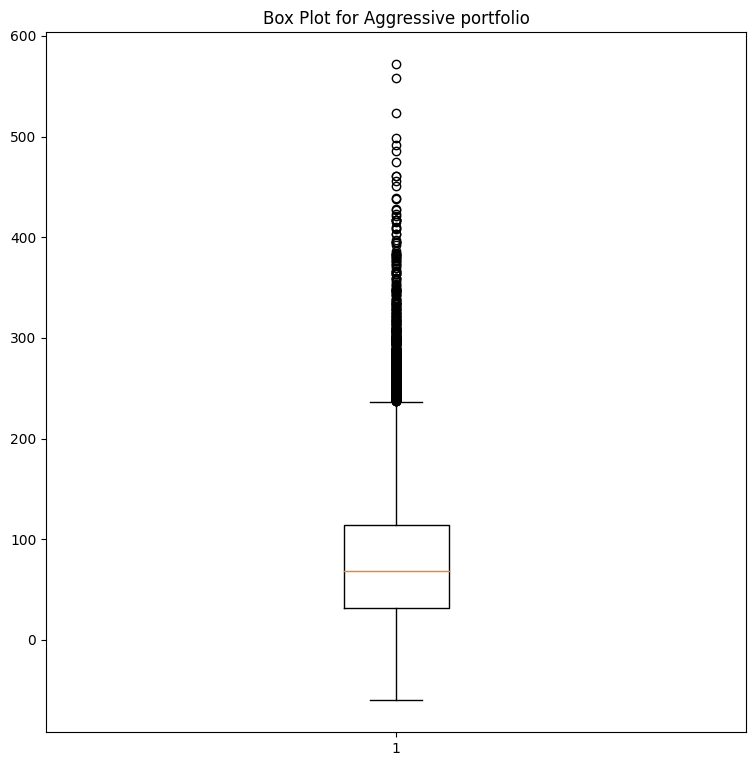

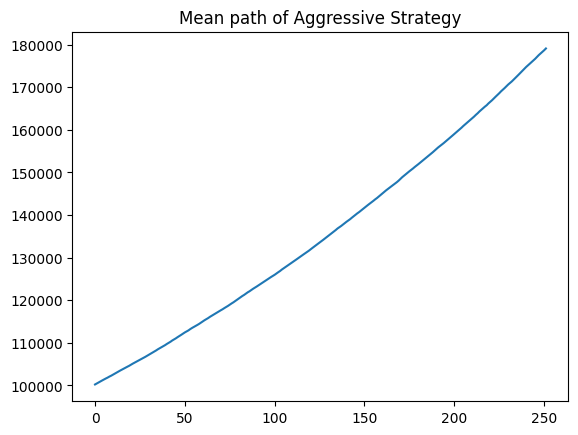

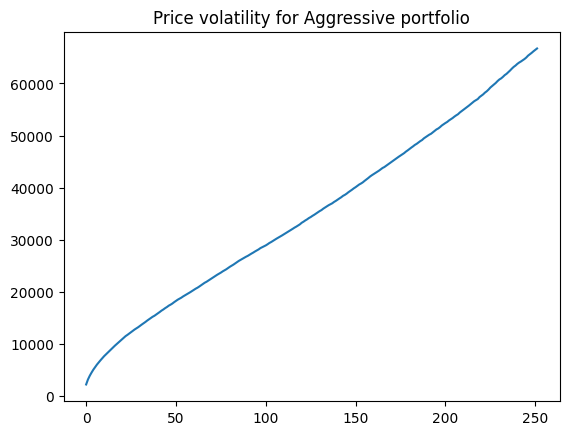

VaR $93068.62
The maximum returns of Aggressive:-
571.981669913586
The average returns of Aggressive:-
79.09139220070247
The minimum returns of Aggressive:-
-60.239463586679655
Chances of Aggressive portfolio giving +ve returns
92.56


In [52]:
# Analysis of aggressive portfolio
analysis(aggressive_sims, initial_investment, time_period, mc_sims, 5, 'Aggressive')

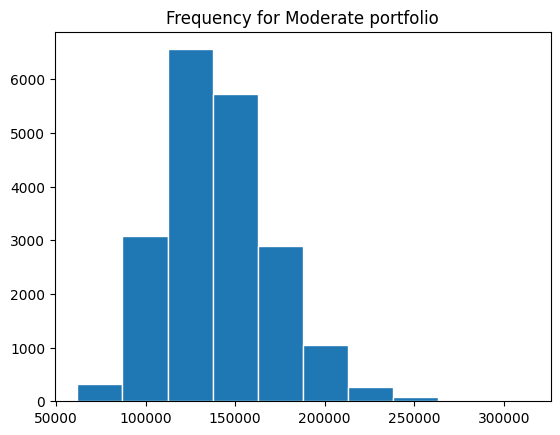

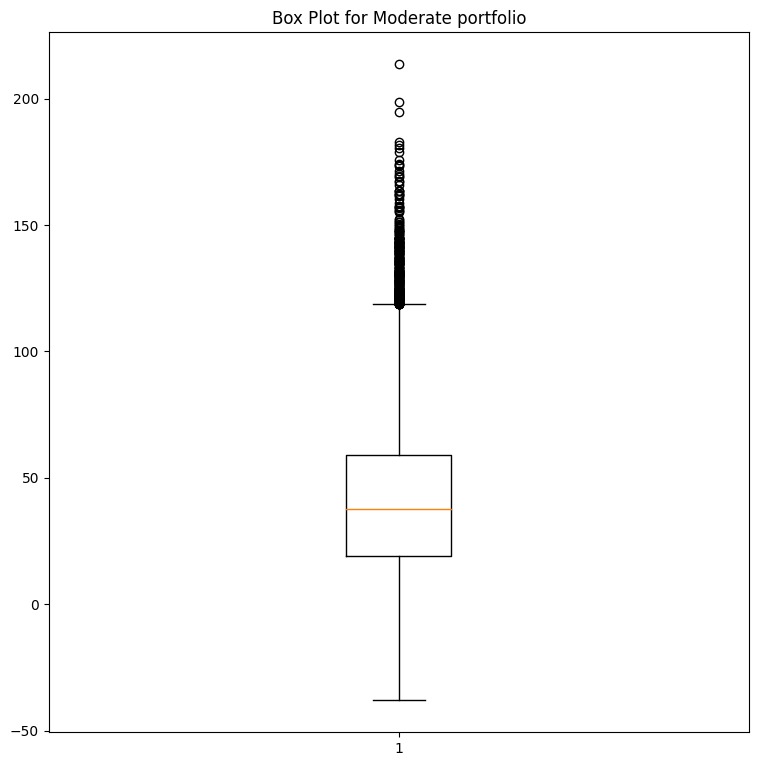

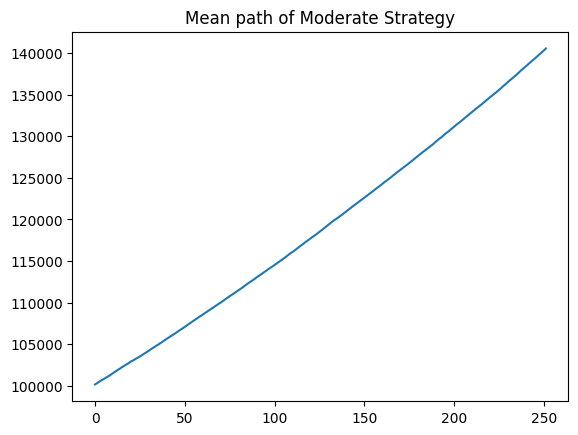

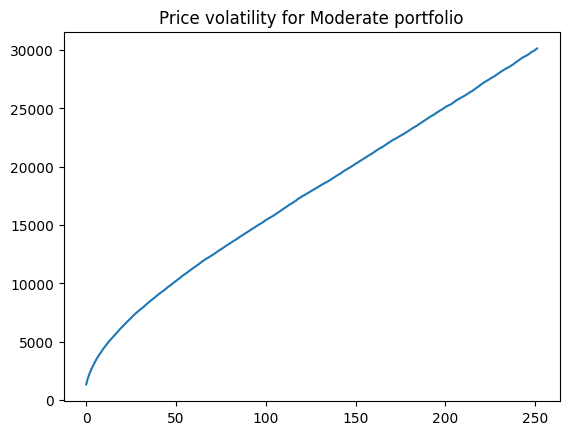

VaR $96807.17
The maximum returns of Moderate:-
213.60533081728965
The average returns of Moderate:-
40.57307015478066
The minimum returns of Moderate:-
-38.02671706948064
Chances of Moderate portfolio giving +ve returns
93.11500000000001


In [53]:
# Analysis of moderate portfolio
analysis(moderate_sims, initial_investment, time_period, mc_sims, 5, 'Moderate')

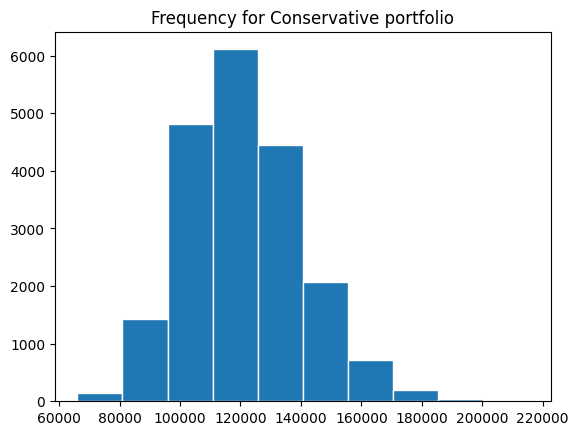

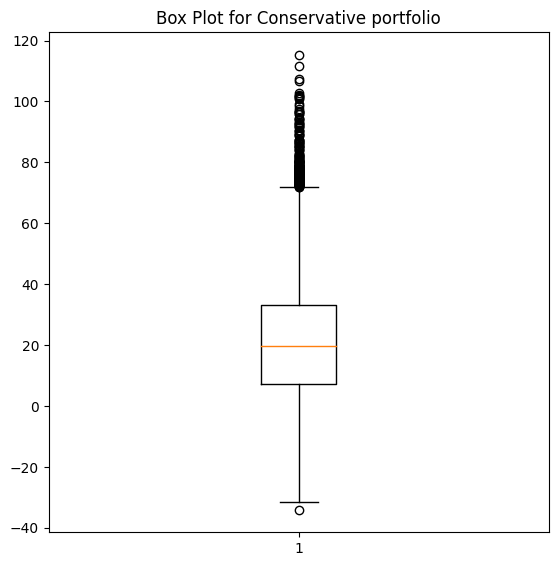

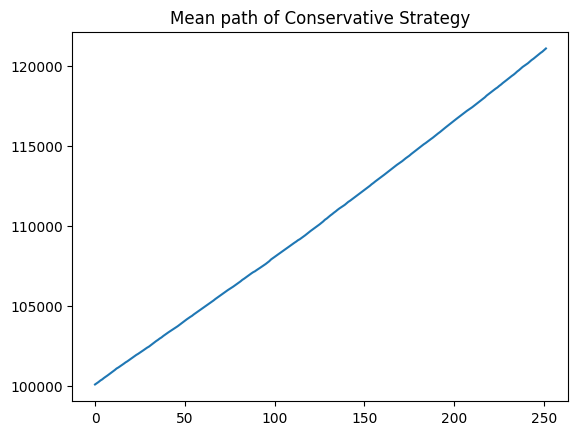

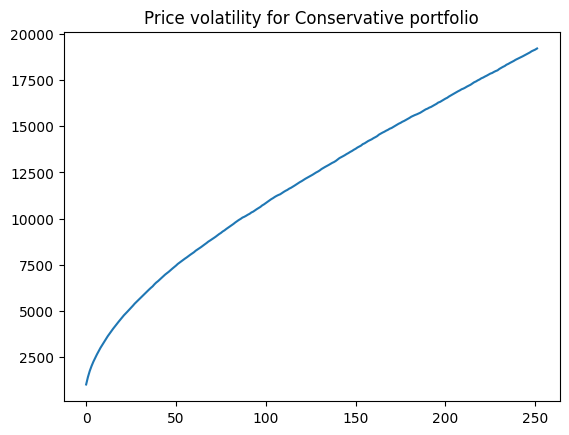

VaR $92434.29
The maximum returns of Conservative:-
115.25467608824722
The average returns of Conservative:-
21.079060779017524
The minimum returns of Conservative:-
-33.97159473132601
Chances of Conservative portfolio giving +ve returns
87.095


In [45]:
# Analysis of conservative portfolio
analysis(conservative_sims, initial_investment, time_period, mc_sims, 5, 'Conservative')